In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/travel insurance.csv',sep=',')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
df.shape

(63326, 11)

In [ ]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [ ]:
for i in df.columns:
  if(df[i].is_unique):
    df=df.drop(i,axis=1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
df.shape

(63326, 11)

In [ ]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [ ]:
for i in df.columns:
  print('length of '+str(i)+' =',len(df[i].unique()))

length of Agency = 16
length of Agency Type = 2
length of Distribution Channel = 2
length of Product Name = 26
length of Claim = 2
length of Duration = 455
length of Destination = 149
length of Net Sales = 1139
length of Commision (in value) = 1035
length of Gender = 3
length of Age = 89


In [ ]:
print('Categorical Columns are:')
cat_cols=[]
for i in df.columns:
  if((len(df[i].unique()))<int(df.shape[0]/130)):
    cat_cols.append(i)
print(cat_cols)

Categorical Columns are:
['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Gender', 'Age']


In [ ]:
cont_cols=list(set(df.columns) - set(cat_cols))
cont_cols

['Commision (in value)', 'Net Sales']

Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd228af13c8>,
      dtype=object)

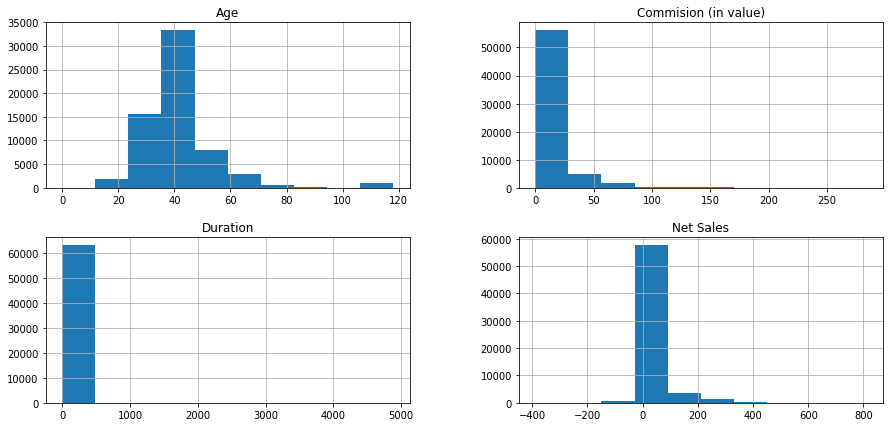

In [ ]:
df.hist(figsize=[15,7])

1. The majority of people i.e. about 32500 of agency are of the age between 37-45, 16000 people are of age between 23-37, 8000 people are between the age group of 45-59, 3000 between 59-70, 2000 between 10-23 and rest between 70-120 leaving the gap of 94-114.
2. Almost 57000 people agecies have the commission of 0-25, and 5000 agencies have the commission of 25-55.
3. the duration of travel of a person is lying between 1-450 for all the cases.
4. In about 59000 cases, the net sales of the agencies lies between -170 to 80, hen 80-210 for 3000 cases.

Text(0, 0.5, 'Number of Cases')

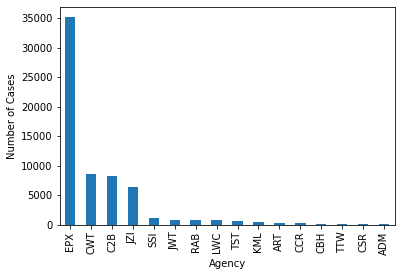

In [ ]:
a=df.Agency.value_counts().plot.bar()
a.set_xlabel('Agency')
a.set_ylabel('Number of Cases')
# EPX claims mostly 

Text(0, 0.5, 'Number of Cases')

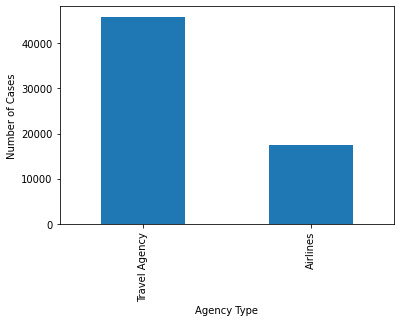

In [ ]:
a=df['Agency Type'].value_counts().plot.bar()
a.set_xlabel('Agency Type')
a.set_ylabel('Number of Cases')
# Travel agencies apply more claims i.e. 70%
# Airlines agencies apply less claims 

Text(0, 0.5, 'Number of Cases')

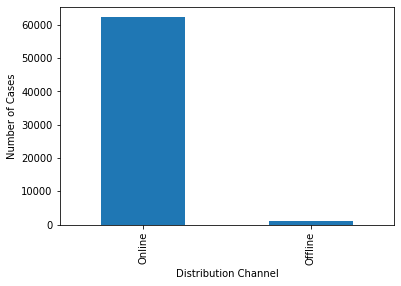

In [ ]:
a=df['Distribution Channel'].value_counts().plot.bar()
a.set_xlabel('Distribution Channel')
a.set_ylabel('Number of Cases')
# Almost all the cases except for very few have online distribution channel

Text(0, 0.5, 'Number of Cases')

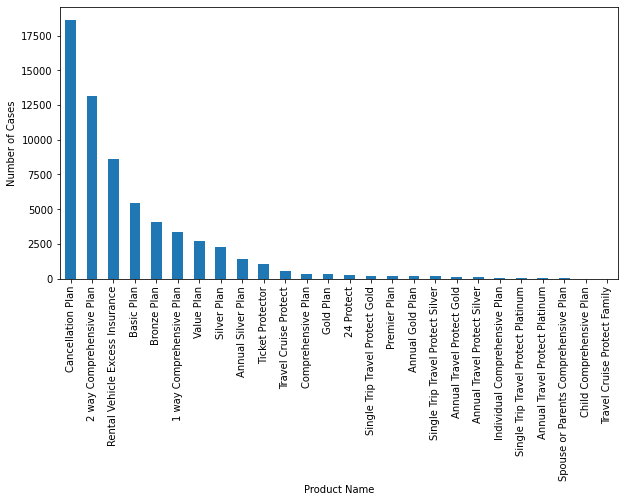

In [ ]:
a=df['Product Name'].value_counts().plot.bar(figsize=(10,5))
a.set_xlabel('Product Name')
a.set_ylabel('Number of Cases')
# Cancellation plans are the more frequently used plan which is understandable as if the trip got cancelled, they'll hope for the getting the refund.

Text(0, 0.5, 'Number of Cases')

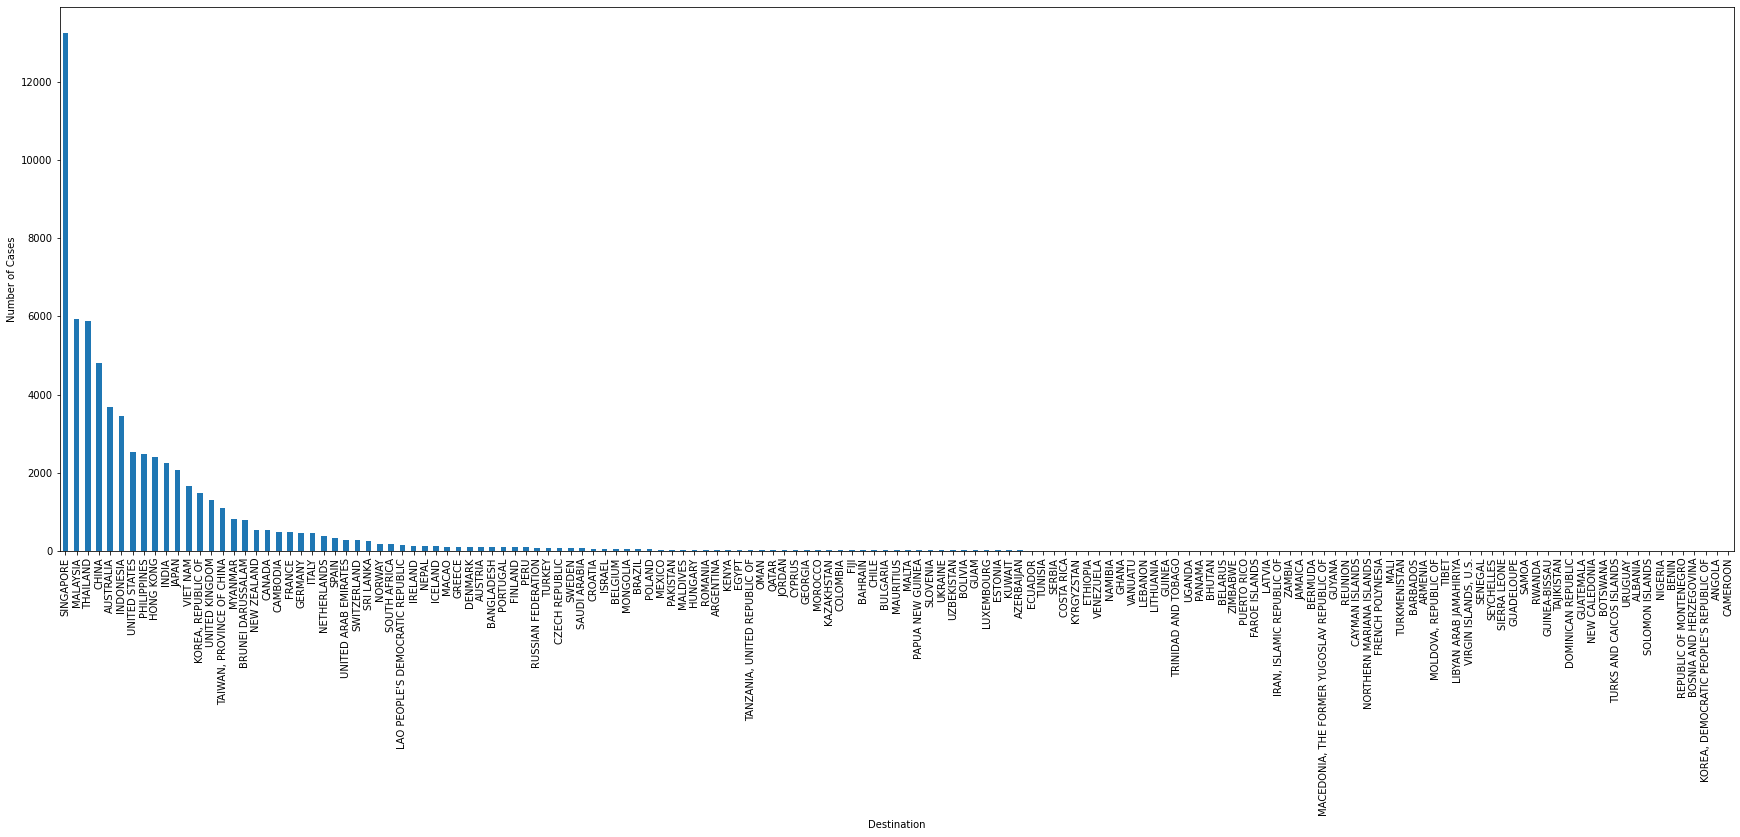

In [ ]:
a=df['Destination'].value_counts().plot.bar(figsize=(30,10))
a.set_xlabel('Destination')
a.set_ylabel('Number of Cases')
# The destination of many cases is Singapore, Malaysia, Thailand, China, US, Phillipines, Hong Kong, India, Japan i.e Asian countries 
# except for US.
# Hence, We can say that people travelling to Asian Countries tends to claim more.    

Text(0, 0.5, 'Number of Cases')

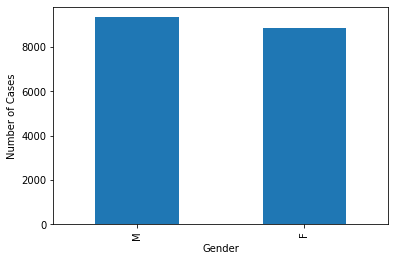

In [ ]:
a=df['Gender'].value_counts().plot.bar()
a.set_xlabel('Gender')
a.set_ylabel('Number of Cases')
# The ratio of male and females claiming for the insurance is almost same, with males slightly more than females.

Claim is a target variable, so there is no need to have an univariate analysis on Claim.

Bivariate Analysis

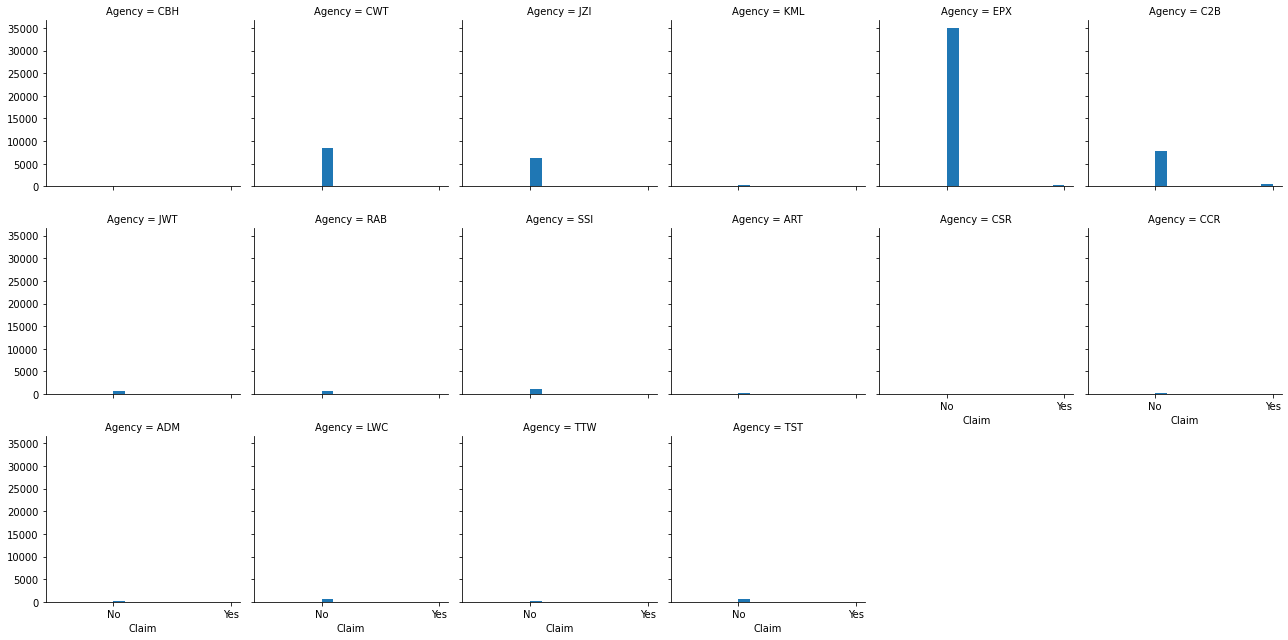

In [ ]:
h=sns.FacetGrid(df,col='Agency',col_wrap=6,height=3)
h=h.map(plt.hist,'Claim')
# Claim is Yes for C2B agency type, the other agencies doesn't apply for the claim at all.
# Claim is No for the EPX agency type in most of the cases.

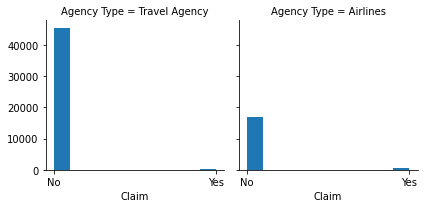

In [ ]:
h=sns.FacetGrid(df,col='Agency Type',height=3)
h=h.map(plt.hist,'Claim')
# Thought the cases of Travel agency are of 70% of the total cases, still Airlines' Claims are more as yes  

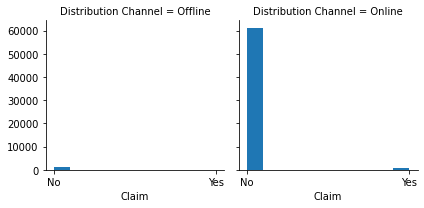

In [ ]:
h=sns.FacetGrid(df,col='Distribution Channel',height=3)
h=h.map(plt.hist,'Claim')
# For offline distribution channel there is not a case where claim is Yes even the number of applicants in the No columns  are very very
# less.
# For online distribution channel there are very few claims that are Yes and No has even for those cases the claim being No has the high
# probability as the number of cases are incomparably larger for the claim being No.

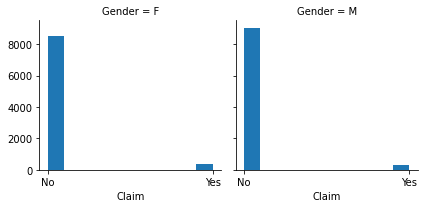

In [ ]:
h=sns.FacetGrid(df,col='Gender',height=3)
h=h.map(plt.hist,'Claim')
# Irrespective of the gender, the number of cases for the acceptance of a claim is almost same with a very slight change.

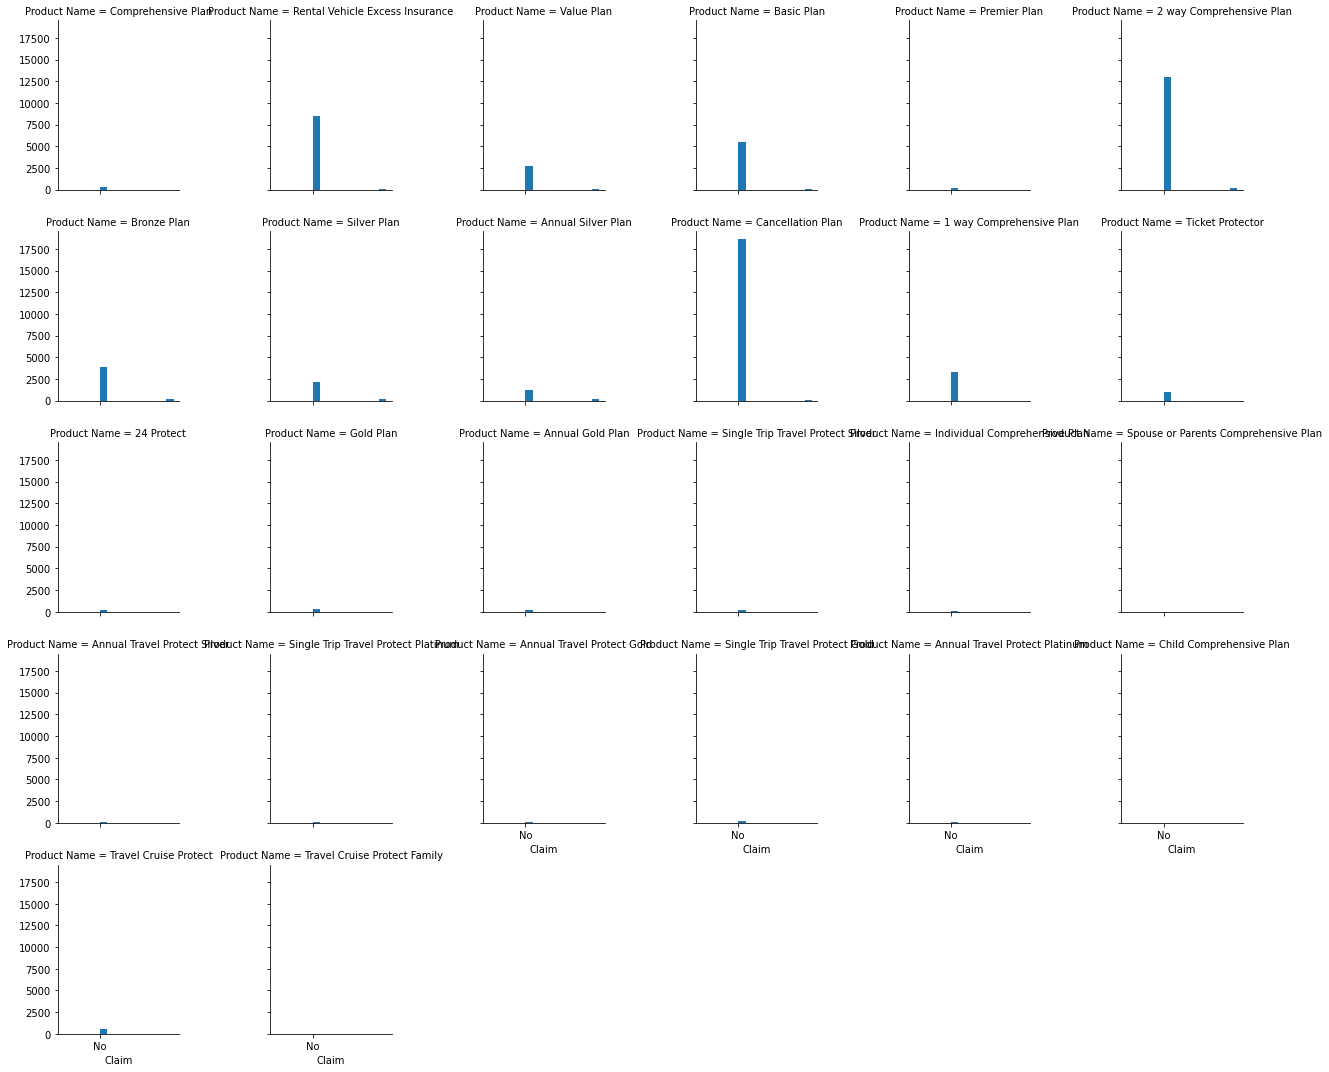

In [ ]:
h=sns.FacetGrid(df,col='Product Name',col_wrap=6,height=3)
h=h.map(plt.hist,'Claim')
# The claim is Yes only in the cases where product name are Rental Vehicle Excess Insurance, Value Plan, Basic Plan,  2 way Comprehensive plan
# Bronze Plan, Silver Plan, Annual Silver Plan, Cancellation Plan,  though the probablility of acceptance is very very low.
# When the product name is Cancellation Plan, Claim is No for the majority of the cases.

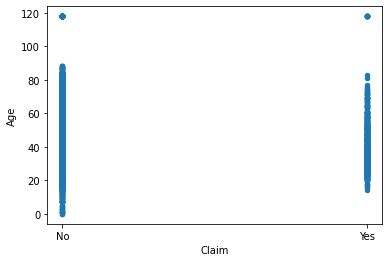

In [ ]:
df.plot.scatter(x='Claim',y='Age')
# People of age lying between 1-90 almost have both the cases of Yes and No of claims but there are outlier in each case having the age 
# 118

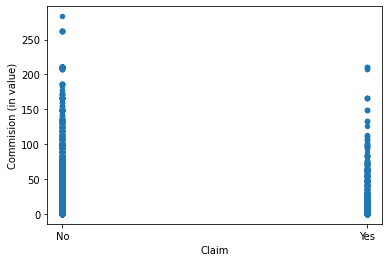

In [ ]:
df.plot.scatter(x='Claim',y='Commision (in value)')
# There is the probablility of claims being both Yes and No0 when the commission ranges form 0-200, but the probabily of the model
# predicting it as No is more as the numebr of datapoints is more when there Claim is No. 

In [ ]:
m=df['Duration'].mean()
df.loc[df['Duration'] <= 0, 'Duration'] = int(m)

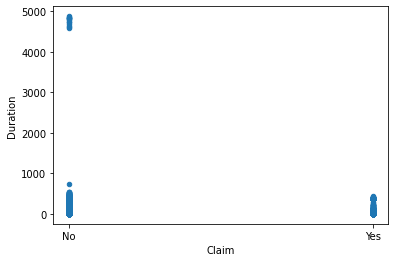

In [ ]:
df.plot.scatter(x='Claim',y='Duration')
# When the Duratio of travel is too high i.e. more than 4500, then the claim will always be No.

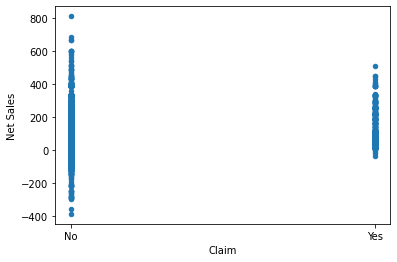

In [ ]:
df.plot.scatter(x='Claim',y='Net Sales')
# when the net sales is between 0 to -400  and 560-800, the claim will always be No

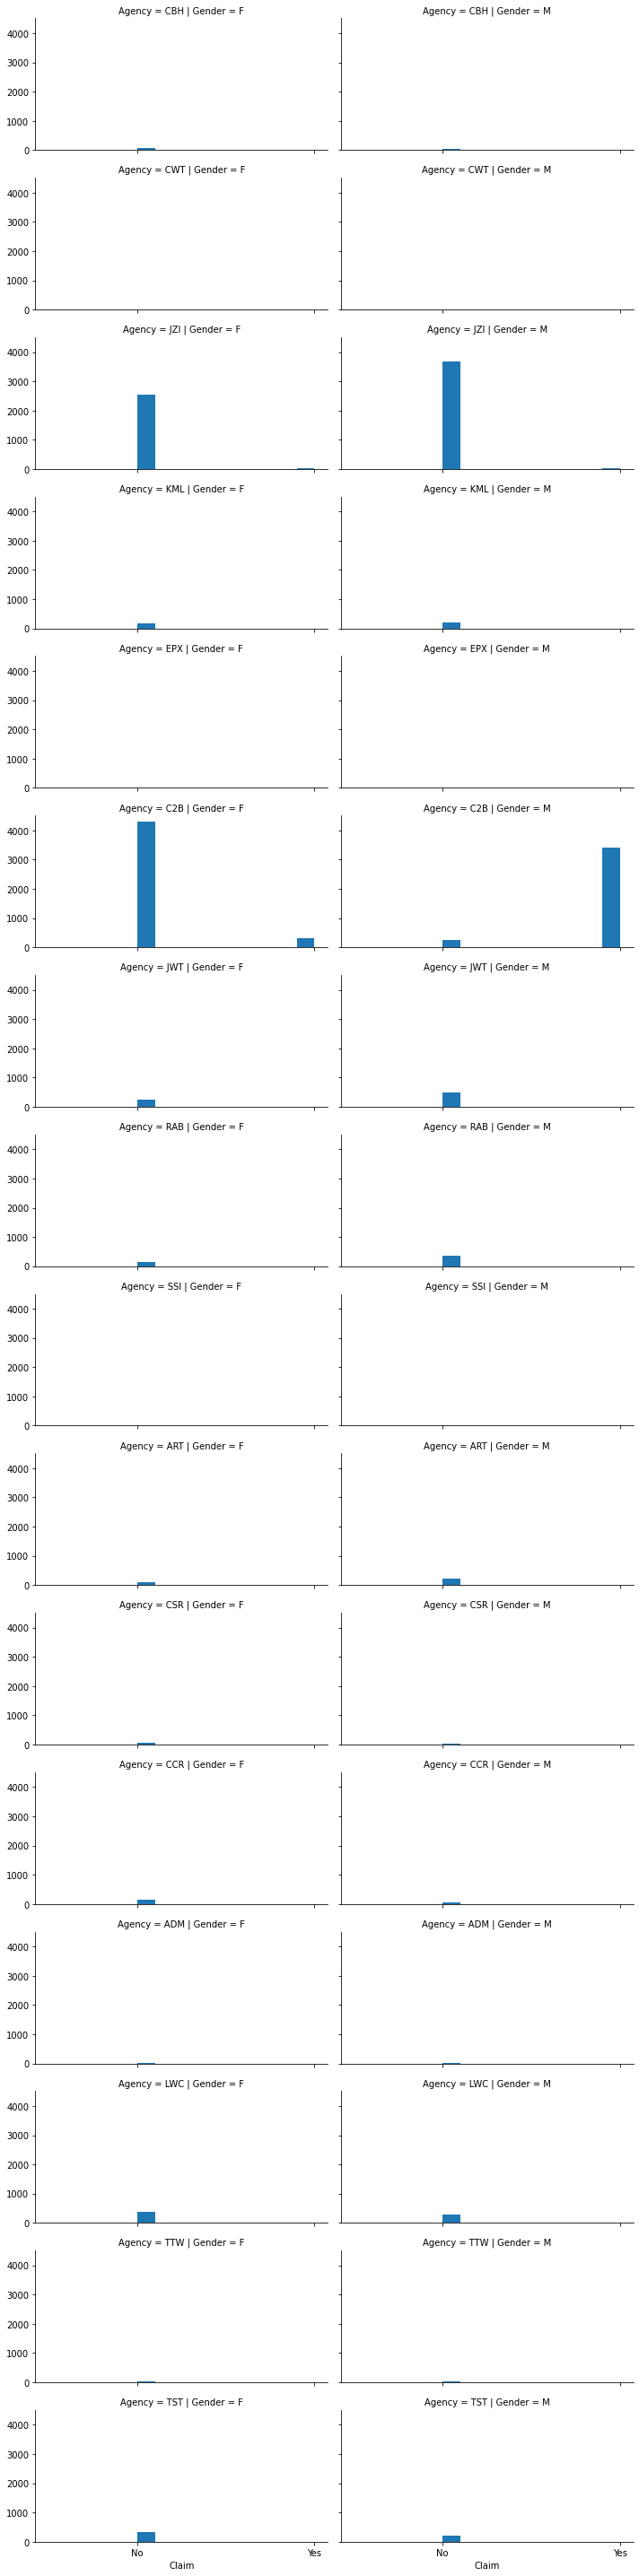

In [ ]:
i=sns.FacetGrid(df,col='Gender',row='Agency',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"Claim")
# When the Agency is C2B, Cases of Claim being No is more when the applicant is Female, and Cases of Claim being Yes is more when Gender 
# is Male and vicecersa
# Irrespective of the Gender, when the Agency is JZI, the claim is No... thought the numebr of cases is more in case of gender is Male.
# In all the other cases, the claim is simply No. 

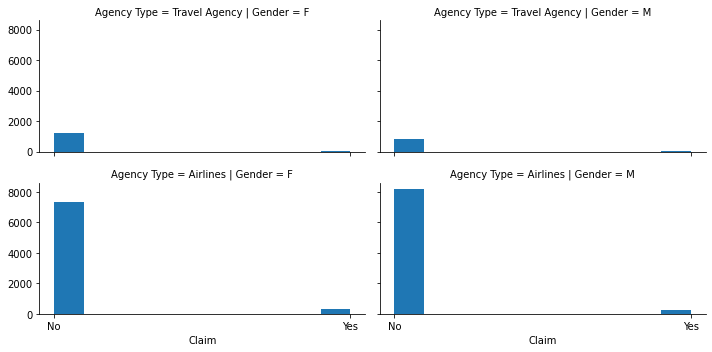

In [ ]:
i=sns.FacetGrid(df,col='Gender',row='Agency Type',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"Claim")
# The distribution of the graphs is almost same in each possible scenario.

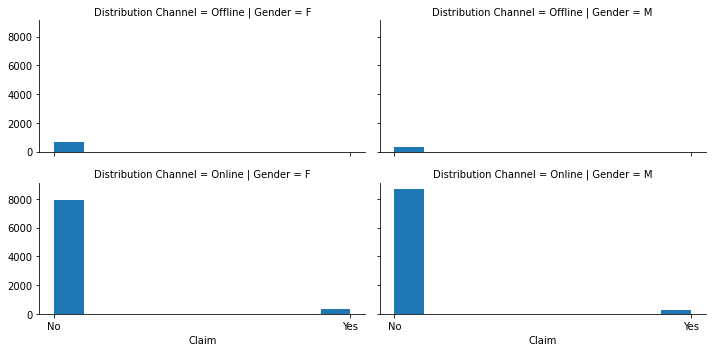

In [ ]:
i=sns.FacetGrid(df,col='Gender',row='Distribution Channel',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"Claim")
# Irespective of the gender, the claims are yes only in the case when distribution channel is online still with very less probabilty.

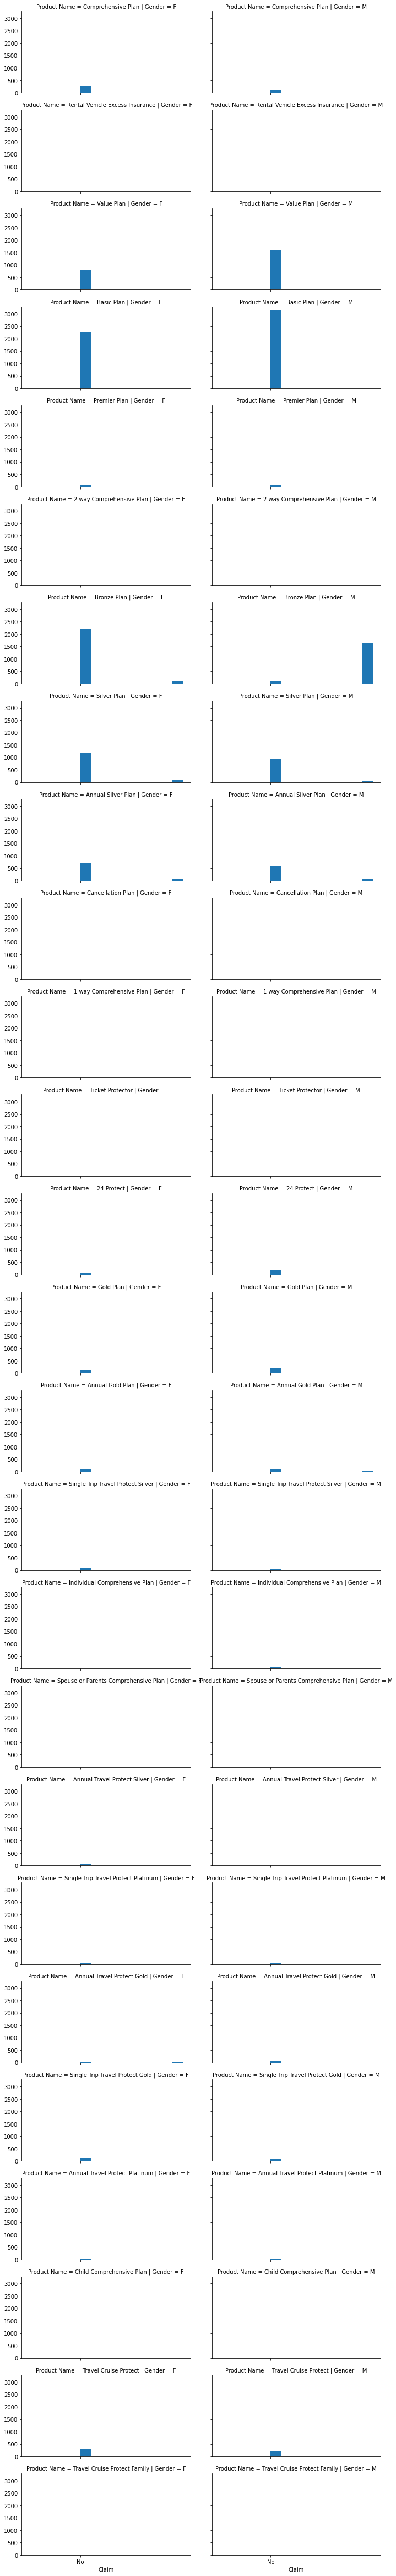

In [ ]:
i=sns.FacetGrid(df,col='Gender',row='Product Name',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"Claim")
# When the Product Name is Bronze, Cases of Claim being No is more when the applicant is Female, and Cases of Claim being Yes is more when
# gender is Male and vicecersa

Handling Outliers

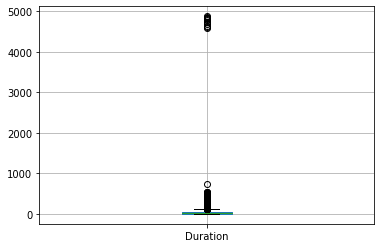

In [ ]:
df.boxplot(column=['Duration'])

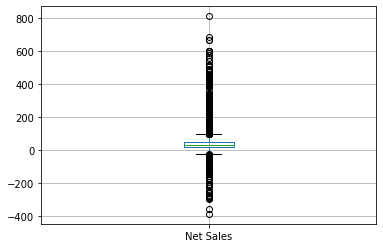

In [ ]:
df.boxplot(column=['Net Sales'])

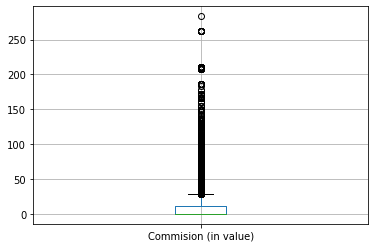

In [ ]:
df.boxplot(column=['Commision (in value)'])

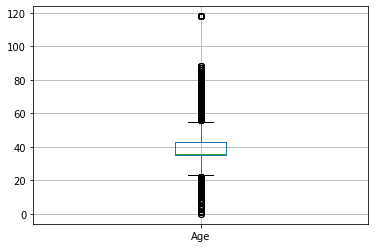

In [ ]:
df.boxplot(column=['Age'])

In [ ]:
#Checking Skewness
for i in cont_cols:
  print(str(i)+' : '+str(df[i].skew()))

Commision (in value) : 4.032268514691959
Net Sales : 3.272372822599944


In [ ]:
#Outlier handling by quantile capping and flooring at 10% and 90%
for i in cont_cols:
  lower=df[i].quantile(0.10)
  upper=df[i].quantile(0.90)
  df[i]=np.where(df[i]<lower,lower,df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])
  print('After Handling outlier, skewness of '+str(i)+' is: ',str(df[i].skew()))

After Handling outlier, skewness of Commision (in value) is:  1.2859578179216349
After Handling outlier, skewness of Net Sales is:  0.8913342339002208


Handling Missing Values

In [ ]:
#Number of Missing Values in each feature
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [ ]:
df=df.drop(columns='Gender')
df.shape

(63326, 10)

In [ ]:
#df['Gender'] = df['Gender'].fillna('X')
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

Deriving Correlation patterns of each independent varaible with the target/dependent variable(Claim)

In [ ]:
le=LabelEncoder()
target_df=pd.DataFrame()
target_df['Claim']=le.fit_transform(df['Claim'])
target_df.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(df['Claim'].value_counts())
lbl_1,lbl_0 = target_df['Claim'].value_counts()
print("Label 0 class %age: "+str((lbl_1*100)/target_df['Claim'].count()))
print("Label 1 class %age: "+str((lbl_0*100)/target_df['Claim'].count()))

No     62399
Yes      927
Name: Claim, dtype: int64
Label 0 class %age: 98.53614629062312
Label 1 class %age: 1.4638537093768753


In [ ]:
df=df.drop(columns='Claim')
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

Label Encoding

In [ ]:
df_le=df.copy()
df_le.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,10.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,186,MALAYSIA,10.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,65,AUSTRALIA,10.0,29.70,X,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,60,AUSTRALIA,10.0,23.76,X,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,79,ITALY,10.0,11.88,X,41


In [ ]:
cat_cols=list(set(cat_cols)-set(['Claim','Duration','Age']))
for i in cat_cols:
  df_le['enc_'+str(i)]=le.fit_transform(df_le[i])
df_enc_le = df_le.drop(columns = cat_cols)
df_enc_le.columns


Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'enc_Gender',
       'enc_Distribution Channel', 'enc_Product Name', 'enc_Agency Type',
       'enc_Agency', 'enc_Destination'],
      dtype='object')

In [ ]:
corr = df_enc_le.corr()
corr.head()

,Duration,Net Sales,Commision (in value),Age,enc_Gender,enc_Distribution Channel,enc_Product Name,enc_Agency Type,enc_Agency,enc_Destination
Duration,1.000000,0.252304,0.230413,0.003734,-0.125108,-0.040852,-0.047940,-0.112331,-0.076173,0.074652
Net Sales,0.252304,1.000000,0.451170,0.044680,-0.113123,-0.003907,-0.009938,-0.044301,-0.182935,-0.016833
Commision (in value),0.230413,0.451170,1.000000,0.181962,-0.358349,-0.024748,0.494778,-0.300560,-0.222255,-0.058917
Age,0.003734,0.044680,0.181962,1.000000,-0.177394,-0.159644,0.273164,-0.221503,0.126357,-0.041579
enc_Gender,-0.125108,-0.113123,-0.358349,-0.177394,1.000000,0.197634,-0.243119,0.793093,0.228212,-0.153557


In [ ]:
corr.shape

(10, 10)

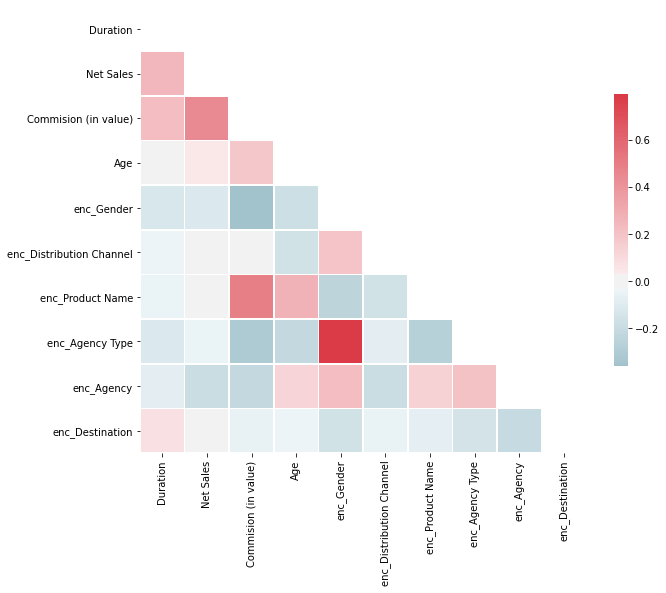

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

Strongest correlation is between- enc_Agency_Type : enc_Gender

**Logistic Regression on Label Encoded Dataset**

Splitting the dataset into training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_enc_le, target_df, test_size=0.25, random_state=33 , stratify=target_df)

In [ ]:
print('set of training features: ', len(x_train))
print('set of training label: ', len(y_train))
print('set of testing features: ', len(x_test))
print('set of testing label: ', len(y_test))

set of training features:  47494
set of training label:  47494
set of testing features:  15832
set of testing label:  15832


In [ ]:
print('For Training')
print(y_train['Claim'].value_counts())
l1,l2=y_train['Claim'].value_counts()
print("Label 0 percentage: "+str((l1*100)/y_train['Claim'].count()))
print("Label 1 percentage: "+str((l2*100)/y_train['Claim'].count()))

print('\n For Testing')
print(y_test['Claim'].value_counts())
l1,l2=y_test['Claim'].value_counts()
print("Label 0 percentage: "+str((l1*100)/y_test['Claim'].count()))
print("Label 1 percentage: "+str((l2*100)/y_test['Claim'].count()))

For Training
0    46799
1      695
Name: Claim, dtype: int64
Label 0 percentage: 98.53665726196994
Label 1 percentage: 1.463342738030067

 For Testing
0    15600
1      232
Name: Claim, dtype: int64
Label 0 percentage: 98.53461344113188
Label 1 percentage: 1.4653865588681152


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logistic_regression.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print('Accuracy= ', accuracy_score(y_test,y_pred))
print('Precision= ', precision_score(y_test,y_pred))
print('Recall= ', recall_score(y_test,y_pred))
print('F1 Score= ', f1_score(y_test,y_pred))
print('ROC-AUC Score=',roc_auc_score(y_test,y_pred))

Confusion Matrix
[[15600     0]
 [  232     0]]
Accuracy=  0.9853461344113188
Precision=  0.0
Recall=  0.0
F1 Score=  0.0
ROC-AUC Score= 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tuning the Parameters

In [ ]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
               'multi_class':['multinomial','auto'],
               'solver':['saga','newton-cg','liblinear','newton-cg','liblinear','sag'],
            'penalty':['l1', 'elasticnet','none'],
            'C':[0.2,0.5,1.0]}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(x_train, y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validat

LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='none', random_state=2, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)


In [ ]:
y_pred = logistic_reg_best_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print('Accuracy= ', accuracy_score(y_test,y_pred))
print('Precision= ', precision_score(y_test,y_pred))
print('Recall= ', recall_score(y_test,y_pred))
print('F1 Score= ', f1_score(y_test,y_pred))
print('ROC-AUC Score=',roc_auc_score(y_test,y_pred))

Confusion Matrix
[[12080  3520]
 [   59   173]]
Accuracy=  0.7739388580090955
Precision=  0.04684538315732467
Recall=  0.7456896551724138
F1 Score=  0.08815286624203822
ROC-AUC Score= 0.7600243147656941


One Hot Encoding

In [ ]:
df_ohe = df.copy()
cat_cols=list(set(cat_cols)-set(['Claim','Duration','Age','Gender']))
for i in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[i], prefix=[i] )
df_ohe.head()

,Duration,Net Sales,Commision (in value),Age,Distribution Channel_Offline,Distribution Channel_Online,Destination_ALBANIA,Destination_ANGOLA,Destination_ARGENTINA,Destination_ARMENIA,Destination_AUSTRALIA,Destination_AUSTRIA,Destination_AZERBAIJAN,Destination_BAHRAIN,Destination_BANGLADESH,Destination_BARBADOS,Destination_BELARUS,Destination_BELGIUM,Destination_BENIN,Destination_BERMUDA,Destination_BHUTAN,Destination_BOLIVIA,Destination_BOSNIA AND HERZEGOVINA,Destination_BOTSWANA,Destination_BRAZIL,Destination_BRUNEI DARUSSALAM,Destination_BULGARIA,Destination_CAMBODIA,Destination_CAMEROON,Destination_CANADA,Destination_CAYMAN ISLANDS,Destination_CHILE,Destination_CHINA,Destination_COLOMBIA,Destination_COSTA RICA,Destination_CROATIA,Destination_CYPRUS,Destination_CZECH REPUBLIC,Destination_DENMARK,Destination_DOMINICAN REPUBLIC,...,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency Type_Airlines,Agency Type_Travel Agency,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,186,10.0,9.57,81,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,186,10.0,9.57,71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65,10.0,29.70,32,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60,10.0,23.76,32,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,79,10.0,11.88,41,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_ohe.shape

(63326, 199)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, target_df, test_size=0.25, random_state=33 , stratify=target_df)

In [ ]:
print('set of training features: ', len(X_train))
print('set of training label: ', len(Y_train))
print('set of testing features: ', len(X_test))
print('set of testing label: ', len(Y_test))

set of training features:  47494
set of training label:  47494
set of testing features:  15832
set of testing label:  15832


In [ ]:
print('For Training')
print(Y_train['Claim'].value_counts())
l1,l2=Y_train['Claim'].value_counts()
print("Label 0 percentage: "+str((l1*100)/Y_train['Claim'].count()))
print("Label 1 percentage: "+str((l2*100)/Y_train['Claim'].count()))

print('\n For Testing')
print(Y_test['Claim'].value_counts())
l1,l2=Y_test['Claim'].value_counts()
print("Label 0 percentage: "+str((l1*100)/Y_test['Claim'].count()))
print("Label 1 percentage: "+str((l2*100)/Y_test['Claim'].count()))

For Training
0    46799
1      695
Name: Claim, dtype: int64
Label 0 percentage: 98.53665726196994
Label 1 percentage: 1.463342738030067

 For Testing
0    15600
1      232
Name: Claim, dtype: int64
Label 0 percentage: 98.53461344113188
Label 1 percentage: 1.4653865588681152


Logistic Regrgession on One Hot encoded Dataset

In [ ]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score=',roc_auc_score(Y_test,y_pred))

Confusion Matrix
[[15600     0]
 [  232     0]]
Accuracy=  0.9853461344113188
Precision=  0.0
Recall=  0.0
F1 Score=  0.0
ROC-AUC Score= 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[2,3,4],
            'max_iter':[40,60],
               'multi_class':['auto'],
               'solver':['saga','newton-cg','sag'],
            'penalty':['l1', 'elasticnet','l2'],
            'C':[0.2,0.5,1.0]}
log_reg=GridSearchCV(estimator=lr, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, Y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validat

LogisticRegression(C=0.2, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=40, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
y_pred = logistic_reg_best_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score=',roc_auc_score(Y_test,y_pred))

Confusion Matrix
[[12308  3292]
 [   51   181]]
Accuracy=  0.7888453764527539
Precision=  0.05211632594298877
Recall=  0.7801724137931034
F1 Score=  0.09770580296896086
ROC-AUC Score= 0.7845733863837312
